<a href="https://colab.research.google.com/github/gisungPark/AISchool/blob/master/%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D_K%ED%8F%89%EA%B7%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 군집분석
- 클래스 레이블이 없는 데이터를 특정 군집으로 묶고자 할 때 활용
- K-MEANS 알고리즘은 학계와 산업현장을 가리지 않고 활약
- K-MEANS의 무작위 성을 보완하기 위한 K-MEANS++ 기법

In [0]:
from sklearn.datasets import make_blobs

In [0]:
X, y = make_blobs(n_samples=150,    #150개
                  n_features  = 2,  #2차원
                  centers = 3,      #클러스터
                  cluster_std = 0.5,#표준편차
                  shuffle = True,   #
                  random_state = 0)

In [0]:
import matplotlib.pyplot as plt

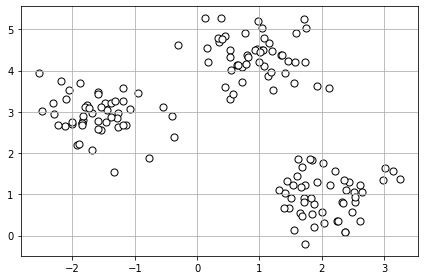

In [4]:
plt.scatter(X[:,0],
            X[:,1],
            c='white',
            marker = 'o',
            edgecolor = 'black',
            s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [0]:
from sklearn.cluster import KMeans

In [0]:
km = KMeans(n_clusters = 3,
            init = 'random',
            n_init = 10,
            max_iter = 300,
            tol=1e-04,
            random_state = 0
            )

In [0]:
y_km = km.fit_predict(X)

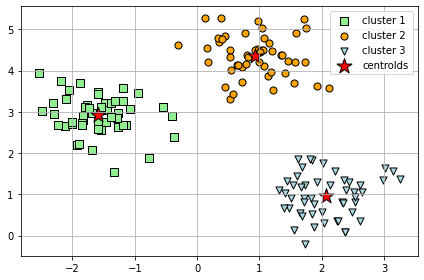

In [0]:
plt.scatter(X[y_km == 0,0],
            X[y_km == 0,1],
            s=50, c='lightgreen',
            marker = 's',
            edgecolor = 'black',
            label = 'cluster 1')

plt.scatter(X[y_km == 1,0],
            X[y_km == 1,1],
            s=50, c='orange',
            marker = 'o',
            edgecolor = 'black',
            label = 'cluster 2')

plt.scatter(X[y_km == 2,0],
            X[y_km == 2,1],
            s=50, c='lightblue',
            marker = 'v',
            edgecolor = 'black',
            label = 'cluster 3')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250, c='red',
            marker = '*',
            edgecolor = 'black',
            label = 'centrolds')
plt.legend(scatterpoints = 1)
plt.grid()
plt.tight_layout()
plt.show()

## 군집분석 k평균++

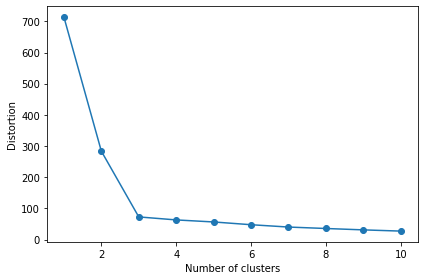

In [14]:
distortions = []
for i in range(1,11):
  km = KMeans(n_clusters = i,
              init = 'k-means++',
              n_init = 10,
              max_iter = 300,
              random_state = 0
              )
  km.fit(X)
  distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### 실루엣 그래프
"클러스터 내 데이터들이 얼마나 조밀하게 모여있는지를 측정하는 그래프 도구"

In [0]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

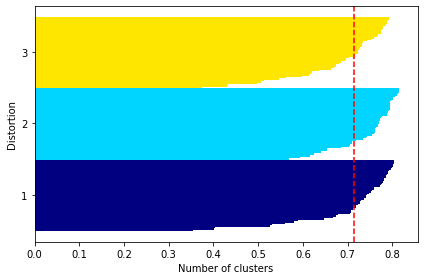

In [21]:
 km = KMeans(n_clusters = 3,
              init = 'k-means++',
              n_init = 10,
              max_iter = 300,
              tol=1e-04,
              random_state = 0
              )
 y_km = km.fit_predict(X)

 cluster_labels = np.unique(y_km)
 n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0,0 
yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0,
           edgecolor ='none', color = color)
  
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = "red", linestyle = '--')

plt.yticks(yticks, cluster_labels + 1)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.tight_layout()
plt.show()